In [1]:
import numpy as np
import os
from os import listdir
from pathlib import Path
import keras.utils as image
import glob

In [47]:
folder_dir=r"C:\Users\91893\machine learning\Image Classification\images"
p=Path(folder_dir)
dirs=p.glob("*")
labels_dict={"cat":0,"horse":1,"human":2}
 
image_data=[]
labels=[]
for folder_name in dirs:
    label=str(folder_name).split("\\")[-1][:-1]
    
    for img_path in folder_name.glob("*.jpg"):
        img=image.load_img(img_path,target_size=(150,150,3))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
    
    for img_path in folder_name.glob("*.png"):
        img=image.load_img(img_path,target_size=(150,150,3))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

In [48]:
#convert data 
image_data=np.array(image_data,dtype='float32')/255.0
labels=np.array(labels)

X=np.array(image_data)
Y=np.array(labels)

from sklearn.utils import shuffle
X,Y=shuffle(X,Y,random_state=2)

In [49]:
#Visualise the data
def drawImg(img):
    from matplotlib import pyplot as plt
    plt.imshow(img)
    plt.show()

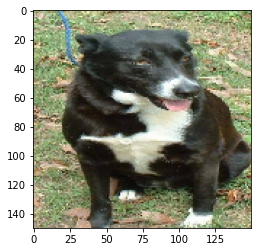

In [50]:
img=image_data[0]
drawImg(img)

In [51]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
import tensorflow as tf
from keras import utils as np_utils

In [52]:
model=Sequential()
#first layer is a convulational layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2)) 
model.add(Convolution2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.25)) #Dropping out 25% neurons of the previous layer
model.add(MaxPooling2D(2,2)) #using maxpooling of 2*2 filter size
model.add(Convolution2D(128,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(3,activation="softmax")) #for 10 outputs
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 dropout_8 (Dropout)         (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 128)      

In [53]:
#we increased the pooling layers so as to decrease the params

In [54]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [55]:
#hist=model.fit(X,Y,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)
from keras.preprocessing.image import ImageDataGenerator
#we are not using model.fit instead we are trying something else and going to import batch one by one to avoid memory issues

In [66]:
#we can do data augmentation to avoid overfitting

In [69]:
train_gen=ImageDataGenerator(rescale=1.0/255,
                            rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.3,
                             horizontal_flip=True
                            )
#however the test generator will be different
test_gen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_gen.flow_from_directory(
"images/",target_size=(150,150),batch_size=32,class_mode='categorical')

Found 1374 images belonging to 3 classes.


In [57]:
val_gen=ImageDataGenerator(rescale=1.0/255)
val_generator=train_gen.flow_from_directory(
"val_images/",target_size=(150,150),batch_size=32,class_mode='categorical')

Found 153 images belonging to 3 classes.


In [58]:
#image generator helps to avoid tasks like opening the directory reading the files using such a long method
#it allows to import images by reshaping it and importing it in batches
#the output data is categorical

In [59]:
history=model.fit_generator(
train_generator,
epochs=20,
steps_per_epoch=8,
validation_data=val_generator,
validation_steps=4
)

Epoch 1/20


C:\Users\91893\AppData\Local\Temp\ipykernel_4888\4165880066.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


8/8 [==============================] - 8s 814ms/step - loss: 1.1097 - accuracy: 0.3438 - val_loss: 1.0694 - val_accuracy: 0.3750
Epoch 2/20
8/8 [==============================] - 7s 820ms/step - loss: 1.0419 - accuracy: 0.4375 - val_loss: 0.9835 - val_accuracy: 0.3906
Epoch 3/20
8/8 [==============================] - 7s 859ms/step - loss: 0.7406 - accuracy: 0.6797 - val_loss: 0.8410 - val_accuracy: 0.5938
Epoch 4/20
8/8 [==============================] - 7s 880ms/step - loss: 0.5942 - accuracy: 0.6953 - val_loss: 1.3841 - val_accuracy: 0.5078
Epoch 5/20
8/8 [==============================] - 7s 877ms/step - loss: 0.4711 - accuracy: 0.7656 - val_loss: 0.8986 - val_accuracy: 0.6406
Epoch 6/20
8/8 [==============================] - 7s 893ms/step - loss: 0.5309 - accuracy: 0.7756 - val_loss: 1.9264 - val_accuracy: 0.5078
Epoch 7/20
8/8 [==============================] - 7s 907ms/step - loss: 0.4486 - accuracy: 0.8164 - val_loss: 2.4928 - val_accuracy: 0.4453
Epoch 8/20
8/8 [===============

In [30]:
#accuracy is almost 93%

CREATING VALIDATION SET

In [31]:
import os,shutil
folders=os.listdir("images")


In [39]:
if not os.path.isdir("val_images"):
    os.mkdir("val_images")
classes=['cats','horses','humans']

In [44]:
for c in classes:
    p=os.path.join("val_images/",c)
    print(p)
    if not os.path.isdir(p):
        os.mkdir(p)

val_images/cats
val_images/horses
val_images/humans


In [45]:
SPLIT=0.9
for f in os.listdir("images"):
    path="images/"+f
    imgs=os.listdir(path)
    
    split_size=int(SPLIT*len(imgs))
    files_to_move=imgs[split_size:]
    #print(len(files_to_move))
    
    for img_f in files_to_move:
        src=os.path.join(path,img_f)
        dest=os.path.join("val_images/"+f,img_f)
        shutil.move(src,dest)
        #print(src)
        #print(dest)

PLOTTING THE GRAPHS

In [60]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [62]:
import matplotlib.pyplot as plt

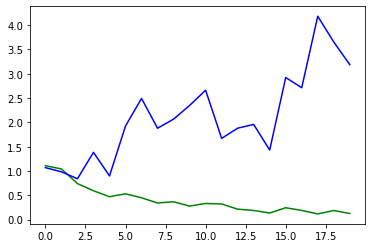

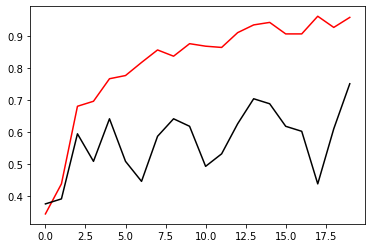

In [65]:
plt.figure(0)
plt.plot(loss,'g')
plt.plot(val_loss,'b')
plt.show()

plt.plot(acc,'r')
plt.plot(val_acc,'black')
plt.show()